In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
# importing data set
dataset = pd.read_csv("diabetes.csv")

Text(0.5, 1.0, 'Correlation Plot')

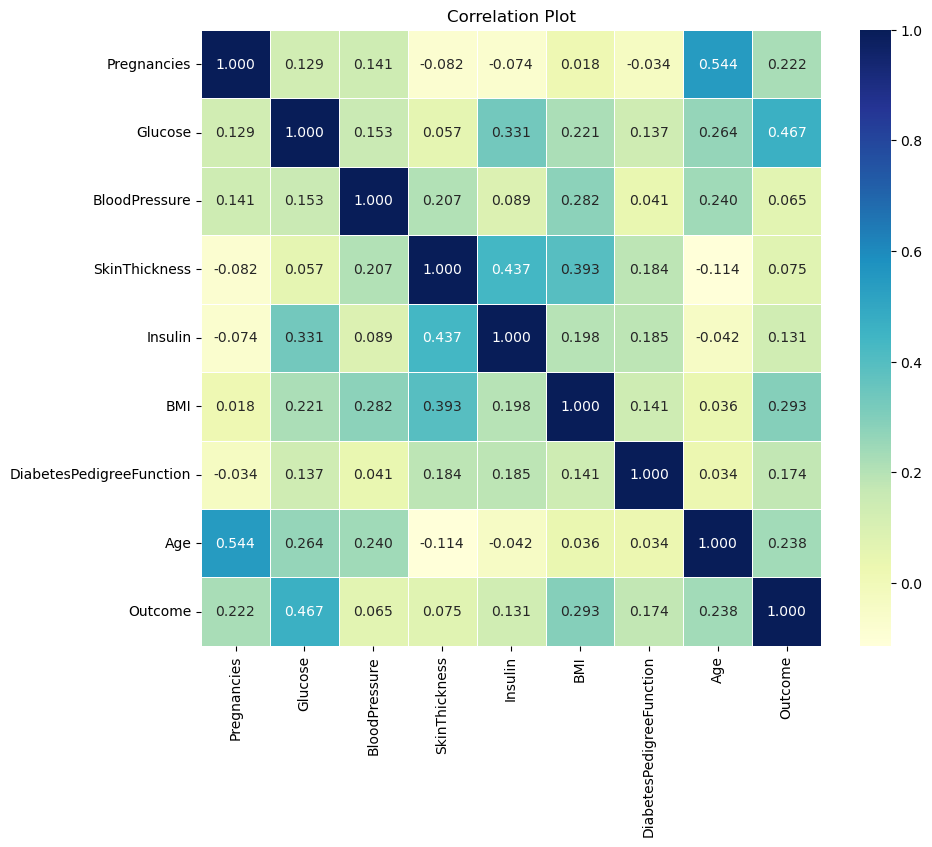

In [135]:
# correlation plot of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu', linewidths=0.5 , fmt='.3f')
plt.title('Correlation Plot')

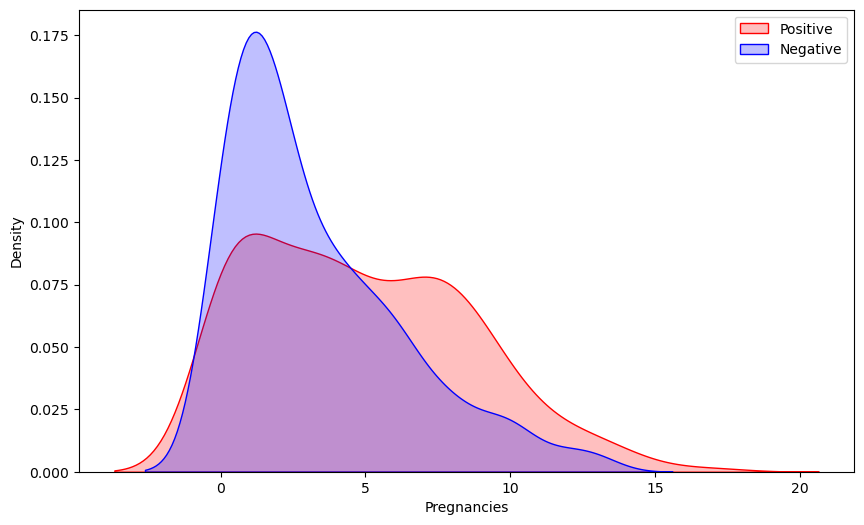

In [136]:
# exploring the pregnancy and target variable
plt.figure(figsize=(10,6))
# ploting density function graph of thr pregnancies and the target variable
kde = sns.kdeplot(dataset['Pregnancies'] [dataset['Outcome'] == 1], color='r',fill=True, label='No Diabetes')
kde = sns.kdeplot(dataset['Pregnancies'] [dataset['Outcome'] == 0], color='b',fill=True, label='No Diabetes')
kde.set(xlabel='Pregnancies', ylabel='Density')
kde.legend(["Positive", "Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

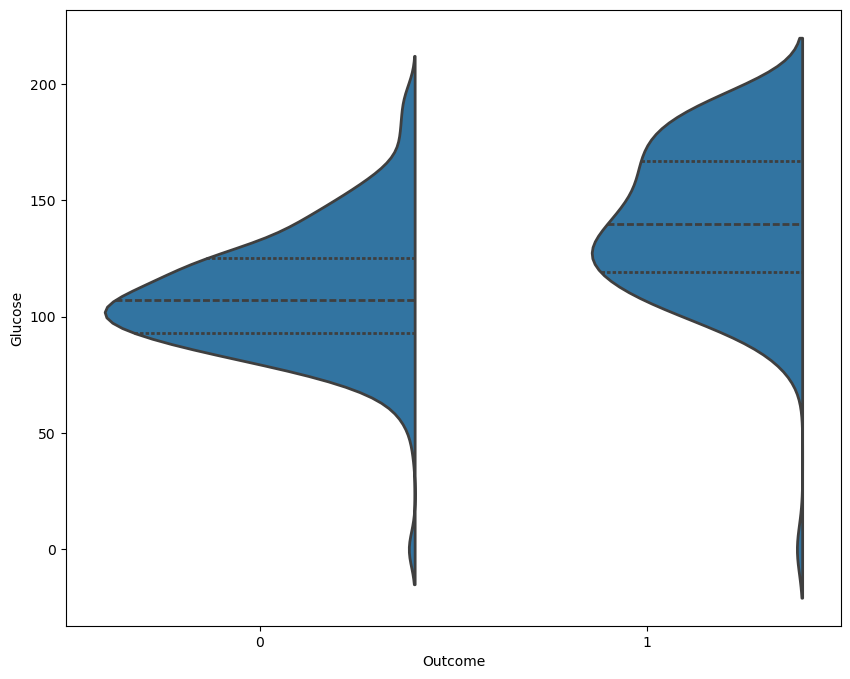

In [137]:
# exploring the glocose and target variable
plt.figure(figsize=(10,8))
# ploting density function graph of thr pregnancies and the target variable
sns.violinplot(x='Outcome', y='Glucose', data=dataset, split=True,inner='quartile',linewidth=2)

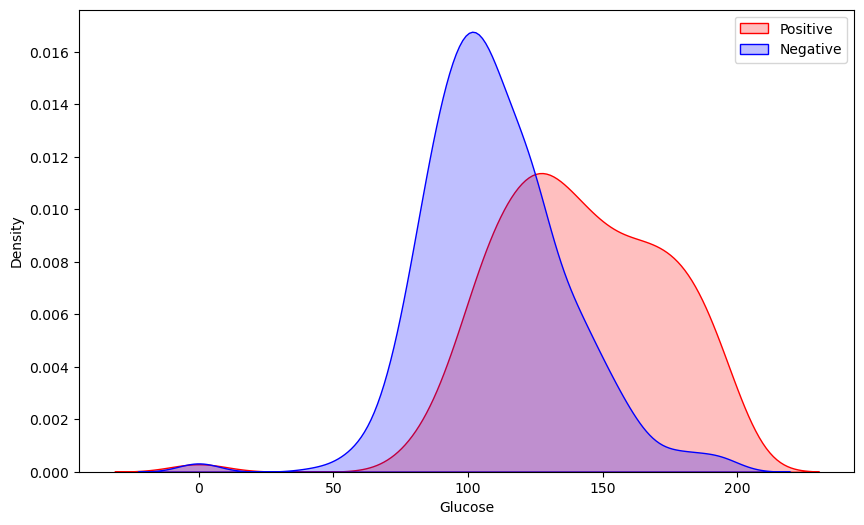

In [138]:
# exploring the glucose and target variable
plt.figure(figsize=(10,6))
# ploting density function graph of thr glucose and the target variable
kde = sns.kdeplot(dataset['Glucose'] [dataset['Outcome'] == 1], color='r',fill=True, label='No Diabetes')
kde = sns.kdeplot(dataset['Glucose'] [dataset['Outcome'] == 0], color='b',fill=True, label='No Diabetes')
kde.set(xlabel='Glucose', ylabel='Density')
kde.legend(["Positive", "Negative"])

In [139]:
# replacing 0 values with the mean or median of the respective feature
# glucose
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].median())
# BloodPressure
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].median())
# BMI
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())
# SkinThickness
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].median())
# Insulin
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.799479,33.6,0.627,50,1
1,1,85,66,29,79.799479,26.6,0.351,31,0
2,8,183,64,23,79.799479,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,79.799479,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,23,79.799479,30.1,0.349,47,1


In [140]:
# spliting the dataset into independent and dependent variables
X = dataset.drop(['Outcome'], axis = 1)
Y = dataset['Outcome']

In [141]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,79.799479,33.6,0.627,50
1,1,85,66,29,79.799479,26.6,0.351,31
2,8,183,64,23,79.799479,23.3,0.672,32
3,1,89,66,23,94.000000,28.1,0.167,21
4,0,137,40,35,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63
764,2,122,70,27,79.799479,36.8,0.340,27
765,5,121,72,23,112.000000,26.2,0.245,30
766,1,126,60,23,79.799479,30.1,0.349,47


In [142]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [143]:
# splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [144]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [145]:
# creating a list of training and testing accuracy
max_neighbors = 100 # maximum number of neighbors
training_accuracy = []
test_accuracy = []
for n_neighbours in range(1, max_neighbors):
    knn = KNeighborsClassifier(n_neighbors = n_neighbours)
    knn.fit(X_train, Y_train)
    
    # check the accuracy of the model
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

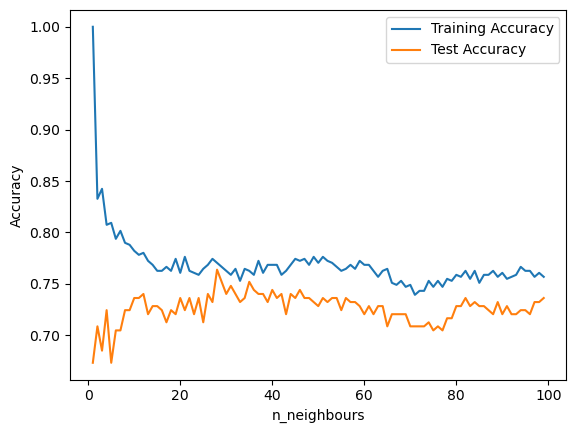

In [146]:
plt.plot(range(1, max_neighbors), training_accuracy, label = 'Training Accuracy')
plt.plot(range(1, max_neighbors), test_accuracy, label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbours')
plt.legend()

In [147]:
# finding the best accuracy and the best n_neighbours
best_accuracy = -1
best_n_neighbours = -1
for i in range(len(test_accuracy)):
    if test_accuracy[i] > best_accuracy:
        best_accuracy = test_accuracy[i]
        best_n_neighbours = i + 1
print(f'Best accuracy: {best_accuracy}')
print(f'Best n_neighbours: {best_n_neighbours}')


Best accuracy: 0.7637795275590551
Best n_neighbours: 28


In [148]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbours)
knn.fit(X_train, Y_train)
knn_train_accuracy = knn.score(X_train, Y_train)
knn_test_accuracy = knn.score(X_test, Y_test)
print(f"{knn_train_accuracy*100:.2f}%"," : Training Accuracy")
print(f"{knn_test_accuracy*100:.2f}% : Test Accuracy")

77.04%  : Training Accuracy
76.38% : Test Accuracy


In [149]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, Y_train)
dt_train_accuracy = dt.score(X_train, Y_train)
dt_test_accuracy = dt.score(X_test, Y_test)
print(f"{dt_train_accuracy*100:.2f}% : Training Accuracy")
print(f"{dt_test_accuracy*100:.2f}% : Test Accuracy")

100.00% : Training Accuracy
68.50% : Test Accuracy


In [150]:
dt1 = DecisionTreeClassifier(random_state = 0, max_depth = 3)
dt1.fit(X_train, Y_train)
dt1_train_accuracy = dt1.score(X_train, Y_train)
dt1_test_accuracy = dt1.score(X_test, Y_test)
print(f"{dt1_train_accuracy*100:.2f}% : Training Accuracy")
print(f"{dt1_test_accuracy*100:.2f}% : Test Accuracy")

77.43% : Training Accuracy
69.29% : Test Accuracy


In [151]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, Y_train)
mlp_train_accuracy = mlp.score(X_train, Y_train)
mlp_test_accuracy = mlp.score(X_test, Y_test)
print(f"{mlp_train_accuracy*100:.2f}% : Training Accuracy")
print(f"{mlp_test_accuracy*100:.2f}% : Test Accuracy")

74.90% : Training Accuracy
69.29% : Test Accuracy


In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [153]:
mlp1 = MLPClassifier(random_state = 0)
mlp1.fit(X_train, Y_train)
mlp1_train_accuracy = mlp1.score(X_train, Y_train)
mlp1_test_accuracy = mlp1.score(X_test, Y_test)
print(f"{mlp1_train_accuracy*100:.2f}% : Training Accuracy")
print(f"{mlp1_test_accuracy*100:.2f}% : Test Accuracy")

75.88% : Training Accuracy
68.50% : Test Accuracy


In [154]:
# comparing the accuracy of the models
print(f"KNN: {knn_test_accuracy*100:.2f}%")
print(f"Decision Tree: {dt_test_accuracy*100:.2f}%")
print(f"Decision Tree with max depth 3: {dt1_test_accuracy*100:.2f}%")
print(f"MLP: {mlp_test_accuracy*100:.2f}%")
print(f"MLP with scaled data: {mlp1_test_accuracy*100:.2f}%")


KNN: 76.38%
Decision Tree: 68.50%
Decision Tree with max depth 3: 69.29%
MLP: 69.29%
MLP with scaled data: 68.50%
